In [1]:
!pip install statsmodels==0.11.0rc1 --quiet
!pip install -Iv pulp==1.6.8 --quiet

  error: subprocess-exited-with-error
  
  × Building wheel for statsmodels (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1379 lines of output]
      <string>:15: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      <string>:51: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
      <string>:54: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
      <string>:51: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\statsmodels
      copying statsmodels\api.py -> build\lib.win-amd64-cpython-310\statsmodels
      copying statsmodels\conftest.py -> build\lib.win-amd64-cpython-310\statsmodels


  Using cached PuLP-1.6.8-py3-none-any.whl
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\Jeff\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip install yfinance --quiet
!pip install pmdarima --quiet



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\Jeff\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\Jeff\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


##### Setup, import modules

In [3]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import pandas as pd
import numpy as np
import yfinance as yf
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots


### Scrape tickers to query in yahoo finance
For the yahoo finance module we will need to specify a bunch of tickers to query for the data, so I scraped 1000 ticker codes from a wiki page about the Russell 1000 index. Could absolutely swap to some other wiki table if needed.

In [4]:
def pull_russell_1000():
    wikiurl="https://en.wikipedia.org/wiki/Russell_1000_Index"
    response=requests.get(wikiurl)
    print(response.status_code)

    soup = BeautifulSoup(response.text, 'html.parser')
    html_table=soup.find('table',{'class':"wikitable sortable"})
    df=pd.read_html(str(html_table))
    # convert list to dataframe
    df=pd.DataFrame(df[0])
    return df

In [5]:
df=pull_russell_1000()
ticker_list=df['Ticker'].values.tolist()

200


C:\Users\Jeff\AppData\Local\Temp\ipykernel_5872\490063380.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(str(html_table))


#### Testing ticker tools

In [6]:
tkrs=yf.Tickers(ticker_list)

In [7]:
tkrs.tickers['MSFT'].info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

In [8]:
tkrs.tickers['MSFT'].history(period='1mo')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-29 00:00:00-04:00,425.690002,430.940002,425.690002,429.170013,15517100,0.0,0.0
2024-05-30 00:00:00-04:00,424.299988,424.299988,414.239990,414.670013,28424800,0.0,0.0
2024-05-31 00:00:00-04:00,416.750000,416.750000,404.510010,415.130005,47995300,0.0,0.0
2024-06-03 00:00:00-04:00,415.529999,416.429993,408.920013,413.519989,17484700,0.0,0.0
2024-06-04 00:00:00-04:00,412.429993,416.440002,409.679993,416.070007,14348900,0.0,0.0
2024-06-05 00:00:00-04:00,417.809998,424.079987,416.299988,424.010010,16988000,0.0,0.0
2024-06-06 00:00:00-04:00,424.010010,425.309998,420.579987,424.519989,14861300,0.0,0.0
2024-06-07 00:00:00-04:00,426.200012,426.279999,423.000000,423.850006,13621700,0.0,0.0
2024-06-10 00:00:00-04:00,424.700012,428.079987,423.890015,427.869995,14003000,0.0,0.0


In [9]:
tkrs.tickers['MSFT'].actions

,Dividends,Stock Splits
Date,,


### Query yahoo finance for data
Now that we have our list of tickers we can pull data for them from yahoo finance.

In [10]:
data = yf.download(ticker_list, period="1y")

[*************         28%%                      ]  277 of 1003 completed

$UHAL.B: possibly delisted; No price data found  (period=1y)


[****************      34%%                      ]  343 of 1003 completed

$LEN.B: possibly delisted; No price data found  (period=1y)


[**********************71%%********              ]  716 of 1003 completed

$BF.B: possibly delisted; No price data found  (period=1y)


[*********************100%%**********************]  1003 of 1003 completed

9 Failed downloads:
['UHAL.B', 'LEN.B', 'BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (period=1y)')
['CWEN.A', 'BRK.B', 'HEI.A', 'BF.A']: YFChartError('%ticker%: No data found, symbol may be delisted')
['SOLV', 'GEV']: YFInvalidPeriodError("%ticker%: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']")


1 year of data is a pretty quick download, ~30 secs can easily pull more data in for the actual sim. Seems like some from the russell index fall out, not sure why they don't have some price history but no worries, I think this is good enough sample.


In [11]:
data.head()

Price        Adj Close                                               \
Ticker               A         AA        AAL        AAP        AAPL   
Date                                                                  
2023-06-29  117.198990  33.315277  17.600000  67.163841  188.588455   
2023-06-30  119.611099  33.483040  17.940001  69.201500  192.945312   
2023-07-03  118.686035  33.818558  18.100000  69.841331  191.443298   
2023-07-05  118.865082  33.236324  18.320000  70.048065  190.319260   
2023-07-06  117.800766  32.111351  17.879999  68.866806  190.796738   

Price                                                                 ...  \
Ticker            ABBV        ABNB         ABT       ACGL       ACHC  ...   
Date                                                                  ...   
2023-06-29  128.032928  125.099998  105.520660  73.029999  79.699997  ...   
2023-06-30  129.474426  128.160004  106.853630  74.849998  79.639999  ...   
2023-07-03  129.743484  132.350006  105.089401  73.989998  79.190002  ...   
2023-07-05  132.251678  131.690002  105.236420  73.620003  77.709999  ...   
2023-07-06  131.896103  128.160004  105.069794  73.870003  76.570000  ...   

Price        Volume                                                      \
Ticker          YUM        Z      ZBH    ZBRA      ZG       ZI     ZION   
Date                                                                      
2023-06-29  1525200  2398100  1169900  310000  445700  6557700  2917900   
2023-06-30  1391800  2746200  1281900  342400  798200  4053700  3698700   
2023-07-03   845600  1172300   662500  184100  175300  2971500  2621400   
2023-07-05  1743100  3047700  1181600  369000  408000  3950700  3181200   
2023-07-06  1869900  2645300   885900  292000  511500  2871700  4488000   

Price                                  
Ticker           ZM       ZS      ZTS  
Date                                   
2023-06-29  2572000  1212500  1429000  
2023-06-30  2055000  1373700  2061100  
2023-07-03  1623100   720500   742900  
2023-07-05  2228300   920300  1702400  
2023-07-06  3178300  2491000  1564300  

[5 rows x 6018 columns]

Very weird format, but its a good start! Just need to fix multilevel index, not sure how we will need to format this data for the monte carlo sim.

In [12]:
data.shape

(252, 6018)

In [13]:
data.head()

Price        Adj Close                                               \
Ticker               A         AA        AAL        AAP        AAPL   
Date                                                                  
2023-06-29  117.198990  33.315277  17.600000  67.163841  188.588455   
2023-06-30  119.611099  33.483040  17.940001  69.201500  192.945312   
2023-07-03  118.686035  33.818558  18.100000  69.841331  191.443298   
2023-07-05  118.865082  33.236324  18.320000  70.048065  190.319260   
2023-07-06  117.800766  32.111351  17.879999  68.866806  190.796738   

Price                                                                 ...  \
Ticker            ABBV        ABNB         ABT       ACGL       ACHC  ...   
Date                                                                  ...   
2023-06-29  128.032928  125.099998  105.520660  73.029999  79.699997  ...   
2023-06-30  129.474426  128.160004  106.853630  74.849998  79.639999  ...   
2023-07-03  129.743484  132.350006  105.089401  73.989998  79.190002  ...   
2023-07-05  132.251678  131.690002  105.236420  73.620003  77.709999  ...   
2023-07-06  131.896103  128.160004  105.069794  73.870003  76.570000  ...   

Price        Volume                                                      \
Ticker          YUM        Z      ZBH    ZBRA      ZG       ZI     ZION   
Date                                                                      
2023-06-29  1525200  2398100  1169900  310000  445700  6557700  2917900   
2023-06-30  1391800  2746200  1281900  342400  798200  4053700  3698700   
2023-07-03   845600  1172300   662500  184100  175300  2971500  2621400   
2023-07-05  1743100  3047700  1181600  369000  408000  3950700  3181200   
2023-07-06  1869900  2645300   885900  292000  511500  2871700  4488000   

Price                                  
Ticker           ZM       ZS      ZTS  
Date                                   
2023-06-29  2572000  1212500  1429000  
2023-06-30  2055000  1373700  2061100  
2023-07-03  1623100   720500   742900  
2023-07-05  2228300   920300  1702400  
2023-07-06  3178300  2491000  1564300  

[5 rows x 6018 columns]

In [14]:
df=data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)
df['Ticker'].unique()
df.head(6)

C:\Users\Jeff\AppData\Local\Temp\ipykernel_5872\3319276699.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df=data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)


Ticker,Ticker,A,AA,AAL,AAP,AAPL,ABBV,ABNB,ABT,ACGL,...,YUM,Z,ZBH,ZBRA,ZG,ZI,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-29,Adj Close,1.171990e+02,3.331528e+01,1.760000e+01,6.716384e+01,1.885885e+02,1.280329e+02,1.251000e+02,1.055207e+02,73.029999,...,1.346380e+02,5.017000e+01,1.439559e+02,288.679993,49.009998,2.608000e+01,2.612242e+01,6.760000e+01,1.448400e+02,1.702108e+02
2023-06-29,Close,1.180500e+02,3.376000e+01,1.760000e+01,6.823000e+01,1.895900e+02,1.332300e+02,1.251000e+02,1.076600e+02,73.029999,...,1.372600e+02,5.017000e+01,1.451500e+02,288.679993,49.009998,2.608000e+01,2.728000e+01,6.760000e+01,1.448400e+02,1.718700e+02
2023-06-29,High,1.182500e+02,3.396000e+01,1.798000e+01,6.908000e+01,1.900700e+02,1.339100e+02,1.280000e+02,1.078600e+02,73.050003,...,1.378000e+02,5.238000e+01,1.462100e+02,289.329987,51.389999,2.612000e+01,2.789000e+01,6.855000e+01,1.454400e+02,1.719100e+02
2023-06-29,Low,1.160700e+02,3.308000e+01,1.753000e+01,6.788000e+01,1.889400e+02,1.321300e+02,1.234200e+02,1.069700e+02,71.690002,...,1.346900e+02,4.992000e+01,1.430200e+02,281.799988,48.759998,2.551000e+01,2.706000e+01,6.715000e+01,1.425920e+02,1.682000e+02
2023-06-29,Open,1.161600e+02,3.350000e+01,1.764000e+01,6.842000e+01,1.890800e+02,1.323700e+02,1.276400e+02,1.070300e+02,72.059998,...,1.348900e+02,5.238000e+01,1.431600e+02,283.049988,51.389999,2.562000e+01,2.743000e+01,6.855000e+01,1.448200e+02,1.686500e+02
2023-06-29,Volume,1.885800e+06,5.419200e+06,2.031570e+07,1.407400e+06,4.634730e+07,4.947600e+06,4.242000e+06,3.417400e+06,925500.000000,...,1.525200e+06,2.398100e+06,1.169900e+06,310000.000000,445700.000000,6.557700e+06,2.917900e+06,2.572000e+06,1.212500e+06,1.429000e+06


# MCMC chat gpt

100%|██████████| 1000/1000 [00:00<00:00, 2608.90it/s]


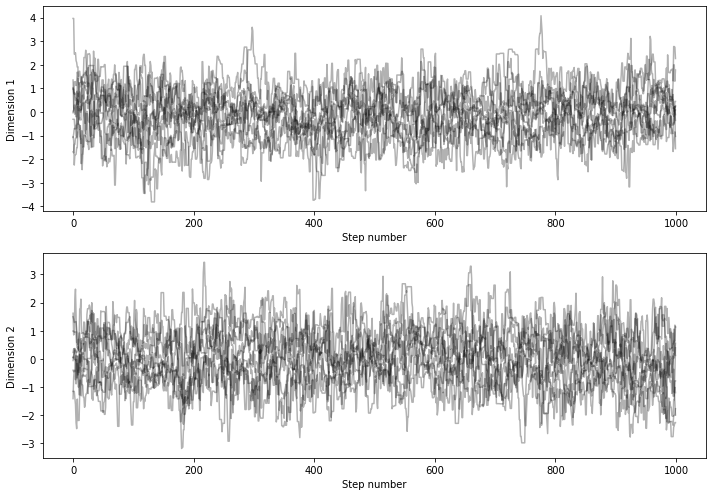

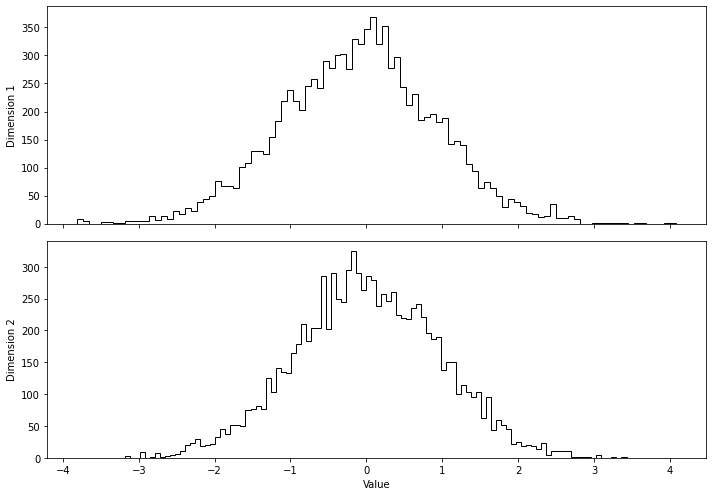

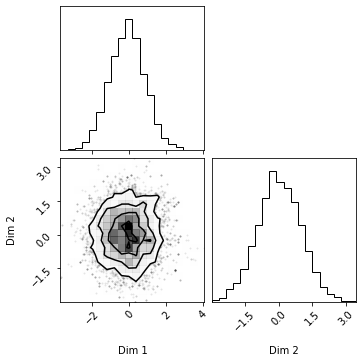

Mean: [-0.11050452  0.02769601]
Covariance matrix: [[0.95993749 0.00704758]
 [0.00704758 0.92761579]]


In [15]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import corner

def log_prob(x):
    return -0.5 * np.sum(x**2)

ndim = 2
nwalkers = 10
initial_state = np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob)

nsteps = 1000
sampler.run_mcmc(initial_state, nsteps, progress=True)

samples = sampler.get_chain()

# Trace plot
plt.figure(figsize=(10, 7))
for i in range(ndim):
    plt.subplot(ndim, 1, i + 1)
    plt.plot(samples[:, :, i], "k", alpha=0.3)
    plt.xlabel("Step number")
    plt.ylabel(f"Dimension {i + 1}")
plt.tight_layout()
plt.show()

# Histogram plot
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
for i in range(ndim):
    axes[i].hist(samples[:, :, i].flatten(), 100, color="k", histtype="step")
    axes[i].set_ylabel(f"Dimension {i + 1}")

axes[-1].set_xlabel("Value")
plt.tight_layout()
plt.show()

burnin = 200
samples = sampler.get_chain(discard=burnin, flat=True)

fig = corner.corner(samples, labels=["Dim 1", "Dim 2"])
plt.show()

mean = np.mean(samples, axis=0)
cov = np.cov(samples, rowvar=False)
print("Mean:", mean)
print("Covariance matrix:", cov)

# MCMC medium article
https://medium.com/p/800d46fceea7

In [16]:
import numpy as np
import math
from numpy import linalg as la
import matplotlib.pyplot as plt
import math
import pandas as pd
import yfinance as yf
import statistics as stat
from scipy.special import ndtri
from scipy.stats import norm
import random
from sklearn.metrics import mean_squared_error

In [17]:
# getting data from Yahoo Finance
stock_name = 'AMD'  # here you can change the name of stock ticker, for example we will take AMD ticker
data = yf.download(stock_name, start="2020-03-26", end="2021-03-29")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-26,45.779999,47.500000,45.400002,47.500000,47.500000,73680200
2020-03-27,46.320000,47.980000,45.900002,46.580002,46.580002,74599200
2020-03-30,47.240002,48.459999,46.660000,47.860001,47.860001,68486600
2020-03-31,47.930000,48.529999,45.160000,45.480000,45.480000,83483700
2020-04-01,44.180000,46.849998,43.160000,43.660000,43.660000,92083100
...,...,...,...,...,...,...
2021-03-22,79.989998,81.269997,79.220001,80.300003,80.300003,39648600
2021-03-23,80.129997,80.339996,77.949997,78.379997,78.379997,40466600
2021-03-24,77.550003,78.800003,76.400002,76.480003,76.480003,43753600


In [18]:
mu, sig, N = 1.1, 1, 100000
pts = []

In [19]:
def q(x):
    return (1 / (math.sqrt(2 * math.pi * sig ** 2))) * (math.e ** (-((x - mu) ** 2) / (2 * sig ** 2)))

In [20]:
def MCMC(N):
    # This I believe is the actual markov chain
    r = np.zeros(1)
    p = q(r[0])
    pts = []

    for i in range(N):
        rn = r + np.random.uniform(-1, 1)
        pn = q(rn[0])
        if pn >= p:
            p = pn
            r = rn
        else:
            u = np.random.rand()
            if u < pn / p:
                p = pn
                r = rn
        pts.append(r)

    pts = random.sample(pts, len(pts))
    pts = np.array(pts)
    
    return pts


In [29]:
def MH(stock_name, data):
    '''
    I believe this is the Metropolis-hastings portion
    
    '''
    
    hist_data = yf.download(stock_name, start="2021-04-01", end="2021-05-04")
    hist_data = hist_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
    hist_data = hist_data['Close']
    hist_data = np.array(hist_data)
    stock_pred = []
    data = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
    dt1 = data['Close']
    maturnity = 1
    volatility = 0.25
    risk_free = 0.1
    timestep = 1
    steps = 22
    delta_t = maturnity / steps
    i = 0
    stock_pred.append(dt1[-1])
    
    while timestep < steps:
        stock_price = stock_pred[-i]
        time_exp = maturnity - delta_t * timestep
        
        # Generate z_t using MCMC method
        pts = MCMC(N)
        stock_price = stock_price * math.exp(((risk_free - 0.5 * (
            math.pow(volatility, 2))) * delta_t + volatility * math.sqrt(delta_t) * pts[timestep + 5]))
        stock_pred.append(stock_price)
        i = i + 1
        timestep = timestep + 1

    rmse = math.sqrt(mean_squared_error(hist_data, stock_pred))
    print(f'RMSE MCMC: {rmse}')
    
    # build graphs
    preds_gr = np.reshape(stock_pred, (22,))
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(0, 21)), y=hist_data, mode='lines+markers',  name='historical', marker_color='#39304A'))
    fig.add_trace(go.Scatter(x=list(range(0, 21)), y=preds_gr, mode='lines+markers', name='predictions', marker_color='#FFAA00'))
    fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  plot_bgcolor='#FFFFFF',  
                  xaxis=dict(gridcolor = 'lightgrey'),
                  yaxis=dict(gridcolor = 'lightgrey'),
                  title_text = f'{stock_name} MCMC prediction', title_x = 0.5,
                  xaxis_title="Timestep",
                  yaxis_title="Stock price",
                  margin=dict(l=0, r=0, t=30, b=0))
    fig.show()
    
    return stock_pred, rmse

In [30]:
mcmc_pred, mcmc_rmse = MH(stock_name, data)
mcmc_pred = np.vstack(mcmc_pred)


[*********************100%%**********************]  1 of 1 completed


C:\Users\Jeff\AppData\Local\Temp\ipykernel_5872\4192579543.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Jeff\AppData\Local\Temp\ipykernel_5872\4192579543.py:25: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



RMSE MCMC: 6.2478289199446735


## RECAP
MCMC breakdown- https://www.youtube.com/watch?v=yApmR-c_hKU

A lot of these predictions seem really poor, I think this might be because we are missing a 'burn in' period like the chat gpt method above.
- **add burn in period**
- **check detailed balance condition? if we can show condition is true then p(x) is a stationary distribution of the markov chain**

This is the actual thing we've built, havent watched yet-

https://www.youtube.com/watch?v=yCv2N7wGDCw